# Lab 02

### Grad. Communications Lab :: ECEN 4652

##### Maurice Woods

##### 3 February 2017


-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------


### E01 - "showft"  to  Approximate  FT

#### Part A.)

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab
/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02


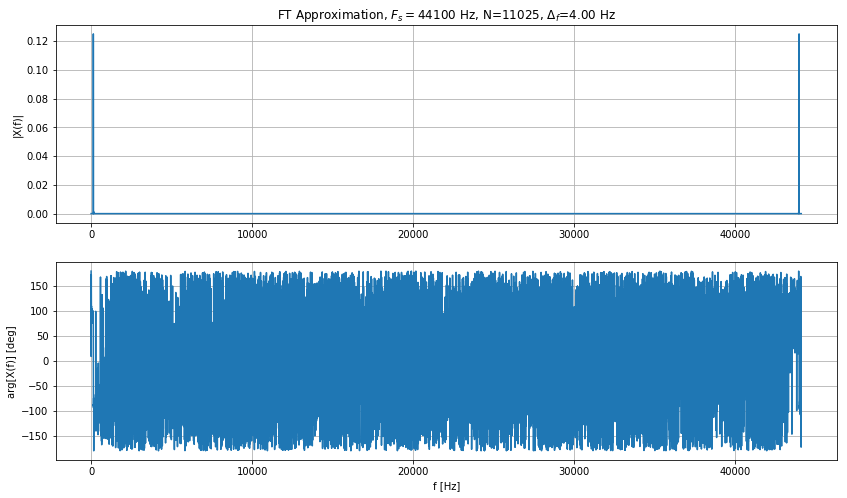

In [1]:
from pylab import *
import ecen4652 as ecen
import showfun                 # Note: May have to change directory to point to showfun.py
% cd ..
from quick import *
% cd -

Fs = 44100                     # Sampling rate
fa, fb = 140, 164              # Frequencies fa, fb
tlen = 0.25                    # Length of t-axis in sec
tt = quicktt(tlen,Fs)       # arange(0,round(Fs*tlen))/float(Fs)  # Time axis
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)
# Linear combination of two sinusoids
sig_xt = ecen.sigWave(xt, Fs, 0)  # Put this data into a 'Waveform' class sigWave
showfun.showft(sig_xt,[-200, 200, 1e-3])  # Display X(f), using ff_lim

As stated, this is not very useful...it's too condensed. We need to change showft() to accept a window in which to display a certain range of data points.

Changes made to showft():
- The ff_lim = [f1,f2,llim] parameter set now controls the horizontal display of the FT
 - Method:
 - If llim>0: Mirror and concatenate absXf() across the Y-Axis, Mirror and concatenate argXf() across X and Y axis, Mirror frequency range across Y-axis (negative)
- The ff_lim = [f1,f2,llim] parameter set now control the vertical display of the FT
 - Method:
 - If (f_low<0): If (absXf[i] < llim): Set argXf[i] to 0

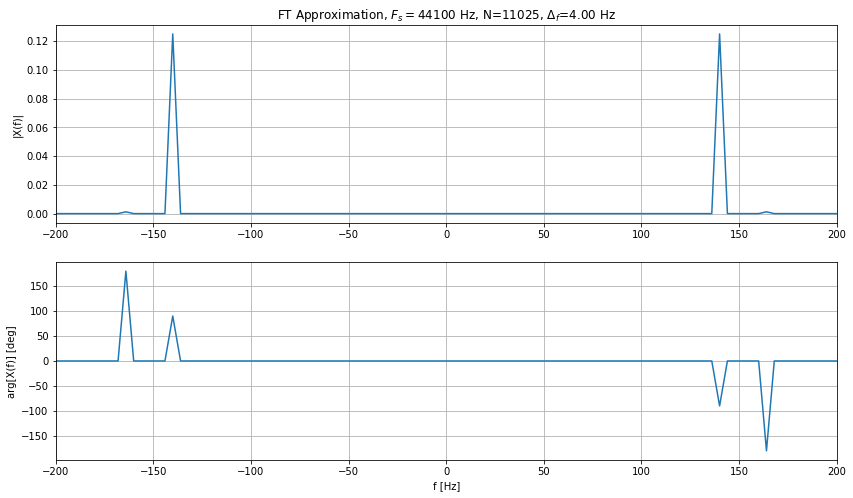

In [2]:
import importlib
showfun.showft_plus(sig_xt,[-200, 200, 1e-3])  # Display X(f), using ff_lim

Question:

> The sine at f_a = 140Hz in x has amplitude 1, but the "spikes" of |X(f)| at f = +/-f_a have only amplitude 0.125. Is that right?

> Hint: For CT impulse functions del(.) the area underneath the impulse determines the size" of the impulse.

Answer:

> Considering the provided hint, taking the width of the base of the spike: $\Delta f * 2 = 4Hz * 2 = 8Hz$, and multiplying it by half of the hight of the spike $(\frac{0.125}{2} = 0.0625)$, the area underneath the spike is $8 * 0.0625 = 0.5$... but! If we include the area beneath the mirrored spike at $-f_a$, the combination adds to 1, which accounts for the magnitude of the sine wave at $f_a=140Hz$

-------------------------------------------------------------------------------------------------------------------------

##### Part B.)

As stated, and confirmed below, sine waves that differ too greatly in amplitude could not be visible on our plots...

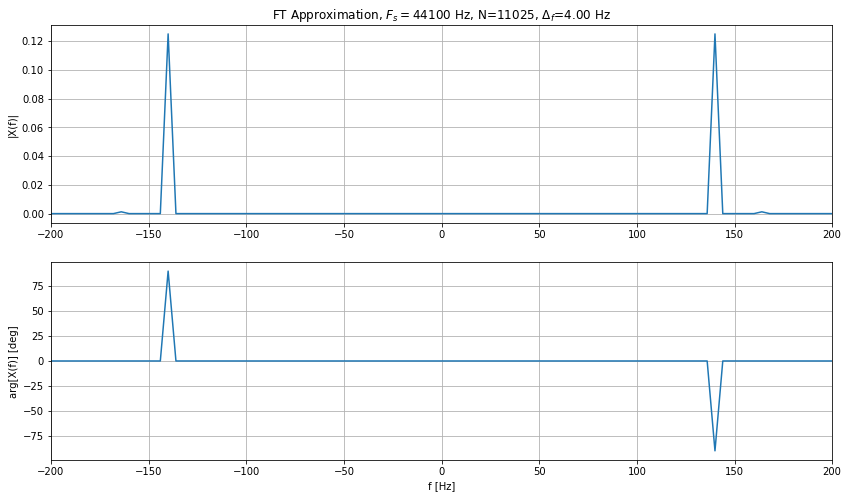

In [3]:
xt2 = sin(2*pi*fa*tt)+0.01*cos(2*pi*fb*tt)
sig_xt2 = ecen.sigWave(xt2, Fs, 0)
showfun.showft_plus(sig_xt2,[-200, 200, 1e-3])

Additional changes made to showft():
- When llim<0 in ff_lim = [f1,f2,llim], the vertical display of the FT is converted to dB
    - Method: 
    - Convert the (negative) llim (in dB) to magnitude
    - If (absXf[i] > llim_magnitude): Convert absXf[i] to dB
    - Else: reassign absXf[i] as llim (in dB)
    - Created new function showft_plusplus()

Now, let's check our fix:

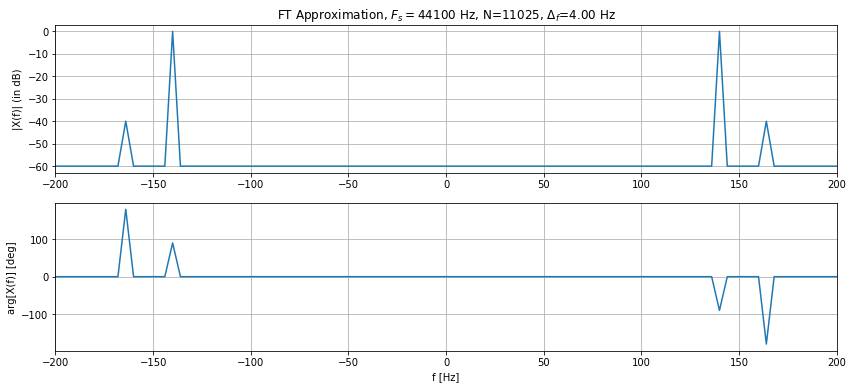

In [4]:
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)
sig_xt = ecen.sigWave(xt, Fs, 0)
showfun.showft_plusplus(sig_xt,[-200, 200, -60]) # Display X(f) in dB, using ff_lim

-------------------------------------------------------------------------------------------------------------------------

##### Part C.)

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02
"Maurice" = 


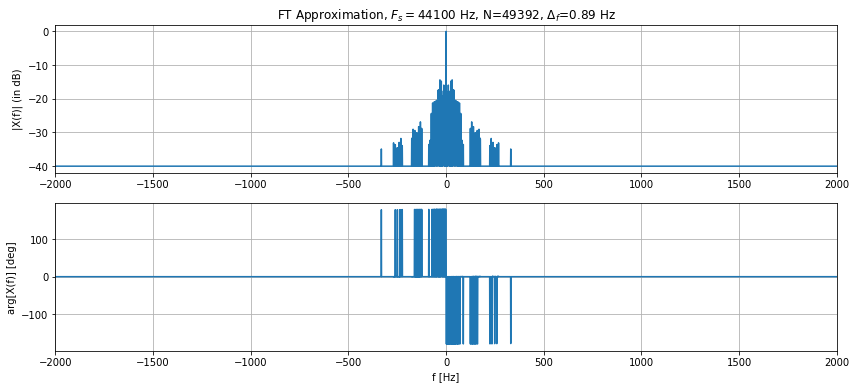

In [5]:
import os
% cd ../Lab01
from ftpam01 import ascii2ftpam
% cd -

Tb=1.0/100.0

[sig_xt,tt,Fs]=ascii2ftpam("Maurice",8,"",44100,1/Tb)
# Mirror the FTPAM string about t=0s
sig_xt = concatenate([sig_xt[::-1],sig_xt])

sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showft_plusplus(sig_xt,[-2000, 2000, -40]) 

-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------

### E02 -  General PAM Transmitter "pam10"

##### Part A.)

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02


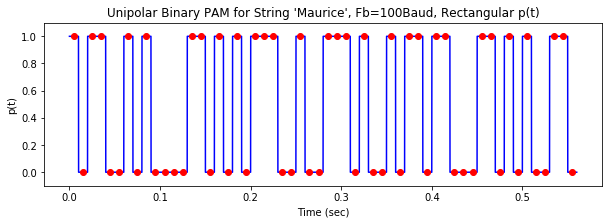

In [6]:
from pamfun import *
from pylab import *

% cd ../Lab01
from ascfun import asc2bin
% cd - 

# Rectangle -----------------------------------------------------------------------------------
Fb = 100 # Baud rate (bits/sec)
Fs = 44100 # Sampling frequency (samples/sec)
Sb = int(Fs/float(Fb)) # Samples per bit

string = "Maurice"
dn = asc2bin(string,8)
sig_pt = ecen.sigSequ(dn,Fb)
pam_pt = pam10(sig_pt,Fs,'rect')
tt=quicktt(pam_pt.sig,pam_pt.Fs)

dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt.sig[int(Sb/2.0)::Sb]

title_str = "Unipolar Binary PAM for String '" + str(string) + "', Fb=" + str(Fb) + "Baud, Rectangular p(t)"
quickplot(tt,pam_pt.sig,"-b",dtt,dpam_pt,"or",title_str,"Time (sec)","p(t)",10,3)

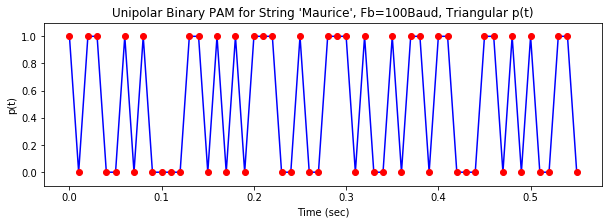

In [7]:
# Triangle -----------------------------------------------------------------------------------
Fb = 100 # Baud rate (bits/sec)
Fs = Fb
Sb = int(Fs/float(Fb)) # Samples per bit

string="Maurice"
dn = asc2bin(string,8)
sig_pt = ecen.sigSequ(dn,Fb)
pam_pt = pam10(sig_pt,Fs,'tri')
tt=quicktt(pam_pt.sig,pam_pt.Fs)

dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt.sig[int(Sb/2.0)::Sb]

title_str="Unipolar Binary PAM for String '" + str(string) + "', Fb=" + str(Fb) + "Baud, Triangular p(t)"
quickplot(tt,pam_pt.sig,"-b",dtt,dpam_pt,"or",title_str,"Time (sec)","p(t)",10,3)

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02


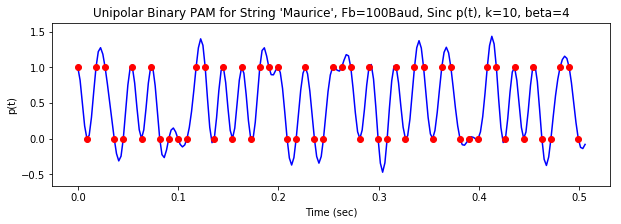

In [8]:
# Sinc -----------------------------------------------------------------------------------
% cd ../Lab01
from sinc_ipol import *
% cd -

Fb = 100 # Baud rate (bits/sec)
Fs = 44100
Sb = int(Fs/float(Fb)) # Samples per bit
beta=4
k=10
fL=3000

string="Maurice"
dn = asc2bin(string,8)
sig_pt = ecen.sigSequ(dn,Fb)
pam_pt = pam10(sig_pt,Fs,'sinc',[k,beta,8]) # TODO
tt=quicktt(pam_pt.sig,pam_pt.Fs,100)

dtt = quicktt(dn,Fs/4,100)
dpam_pt = pam_pt.sig[int(Sb/2.0)::Sb]

title_str="Unipolar Binary PAM for String '" + str(string) + "', Fb=" + str(Fb) + "Baud, Sinc p(t), k=" + str(k) + ", beta=" + str(beta)
quickplot(tt,pam_pt.sig,"-b",dtt,dn,"or",title_str,"Time (sec)","p(t)",10,3)

-------------------------------------------------------------------------------------------------------------------------

##### Part B.)

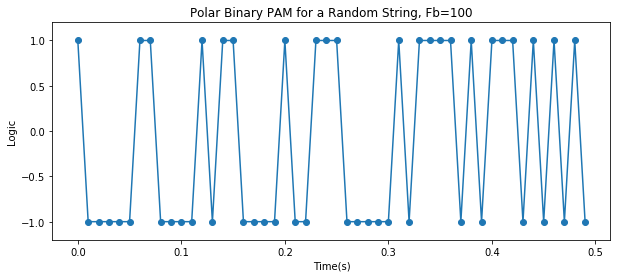

In [9]:
Fb=100
dn = random(int(Fb/2))          # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)     # Random unipolar binary sequence in {0,1}
an = 2*dn-1                     # Random polar binary sequence in {-1,+1}
tt=quicktt(an,Fb)
quickplot(tt,an,"o-",[],[],"","Polar Binary PAM for a Random String, Fb=100","Time(s)","Logic")

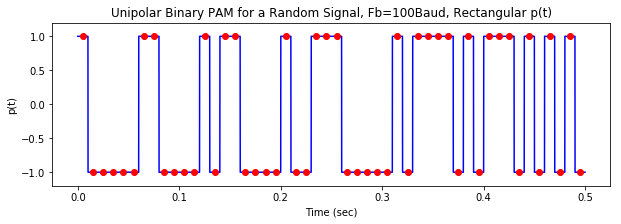

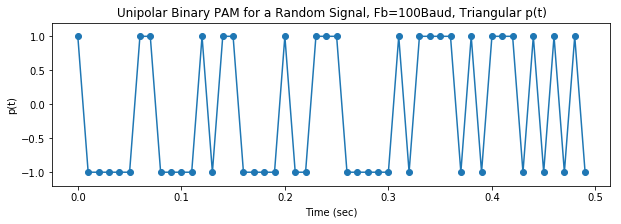

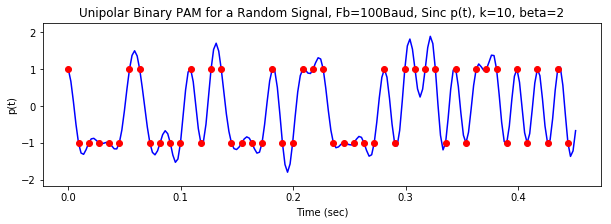

In [10]:
sig_pt = ecen.sigSequ(an,Fb)
pam_pt_rect = pam10(sig_pt,Fs,'rect')
tt=quicktt(pam_pt_rect.sig,pam_pt_rect.Fs)
dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt_rect.sig[int(Sb/2.0)::Sb]
title_str="Unipolar Binary PAM for a Random Signal, Fb=" + str(Fb) + "Baud, Rectangular p(t)"
quickplot(tt,pam_pt_rect.sig,"-b",dtt,dpam_pt,"or",title_str,"Time (sec)","p(t)",10,3)

pam_pt_tri = pam10(sig_pt,Fs,'tri')
tt=quicktt(pam_pt_tri.sig,pam_pt_tri.Fs)
dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt_tri.sig[int(Sb/2.0)::Sb]
title_str="Unipolar Binary PAM for a Random Signal, Fb=" + str(Fb) + "Baud, Triangular p(t)"
quickplot(tt,pam_pt_tri.sig,"-o",dtt,dpam_pt,"or",title_str,"Time (sec)","p(t)",10,3)

k=10
beta=2
pam_pt_sinc = pam10(sig_pt,Fs,'sinc',[k,beta,8]) # TODO
tt=quicktt(pam_pt_sinc.sig,pam_pt_sinc.Fs,100)
dtt = quicktt(dn,Fs/4,100)
title_str="Unipolar Binary PAM for a Random Signal, Fb=" + str(Fb) + "Baud, Sinc p(t), k=" + str(k) + ", beta=" + str(beta)
quickplot(tt,pam_pt_sinc.sig,"-b",dtt,an,"or",title_str,"Time (sec)","p(t)",10,3)




Fourier Transformation Approximation of Rectangular-Interpolated Polar Binary PAM


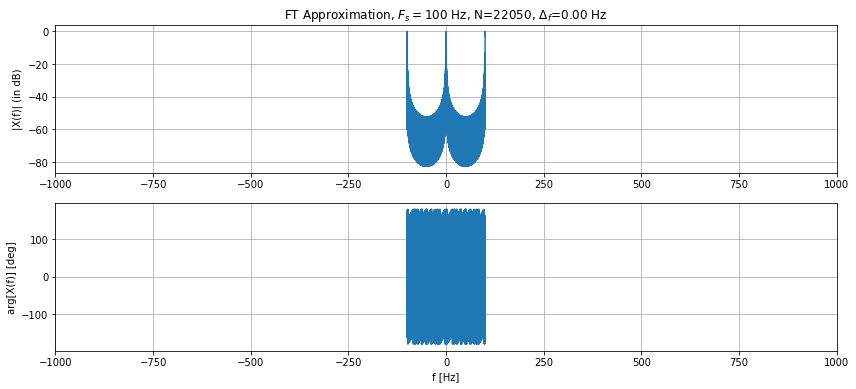



Fourier Transformation Approximation of Triangular-Interpolated Polar Binary PAM


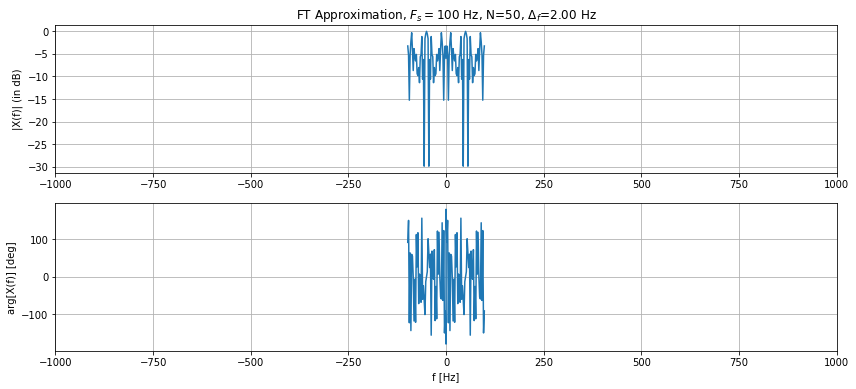



Fourier Transformation Approximation of sinc-Interpolated Polar Binary PAM


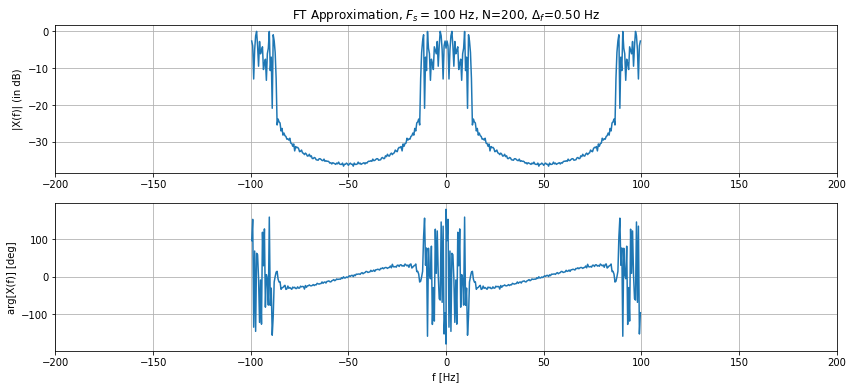

In [11]:
print("\n\nFourier Transformation Approximation of Rectangular-Interpolated Polar Binary PAM")
sig_xt_rect = ecen.sigWave(pam_pt_rect.sig, Fb, 0)
showfun.showft_plusplus(sig_xt_rect,[-1000, 1000, -60]) 

print("\n\nFourier Transformation Approximation of Triangular-Interpolated Polar Binary PAM")
sig_xt_tri = ecen.sigWave(pam_pt_tri.sig, Fb, 0)
showfun.showft_plusplus(sig_xt_tri,[-1000, 1000, -60]) 

print("\n\nFourier Transformation Approximation of sinc-Interpolated Polar Binary PAM")
sig_xt_sinc = ecen.sigWave(pam_pt_sinc.sig, Fb, 0)
showfun.showft_plusplus(sig_xt_sinc,[-200, 200, -60]) 


As the interpolation meathod increases to higher order approximations, the constituent frequencies that make up the interpolated signal (brought out by the Fourier Transform) become more and more concentrated (that is to say, have higher amplitudes and therefore more influence on the shape of the interpolated signal) frequencies. 

-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------
### References
- Youtube: Interpolation - https://www.youtube.com/watch?v=vp4nKygufEc
- Youtube: Sampleing Theorem - https://www.youtube.com/watch?v=_Z7ErH7UTMs